In [1]:
# Arrary and stuff 
import numpy as np
# Linear algebra solvers from scipy
import scipy.linalg as la
# Basic plotting routines from the matplotlib library 
import matplotlib.pyplot as plt

## Problem 2 a)

Use Taylor expansion to show that
for 
$u \in C^3([0,1])$
$$
\| \partial^0u(x) - u'(x) \|_{C([0,1])}
\leqslant 
C h^2
 \| u^{(3)} \|_{C([0,1])}
$$


**Answer:**

We taylor expand central difference to third order.

$$
\partial^0 u(x)
=  \dfrac{u(x+h) - u(x-h)}
{2h}
$$

$$
u(x+h) \approx u(x) + (x+h-x) u'(x) + \dfrac{(x+h-x)^2}{2!} u''(x) + \frac{(x+h-x)^3}{3!} u'''(x) \\
= u(x) + h u'(x) + \dfrac{h^2}{2} u''(x) + \frac{h^3}{6} u'''(x)
$$

$$
u(x-h) \approx u(x) + (x-h-x) u'(x) + \dfrac{(x-h-x)^2}{2!} u''(x) + \frac{(x-h-x)^3}{3!} u'''(x) \\
= u(x) - h u'(x) + \dfrac{h^2}{2} u''(x) - \frac{h^3}{6} u'''(x)
$$

$$\implies$$

$$
\partial^0 u(x) \approx  u'(x) +  \frac{h^2}{6} u'''(x)
$$

$$\implies$$

$$
\| \partial^0u(x) - u'(x) \|_{C([0,1])} \leq \| u'(x) +  \frac{h^2}{6} u'''(x)- u'(x) \|_{C([0,1])}=\frac{h^2}{6}\| u'''(x) \|_{C([0,1])}
$$








## Problem 2 b)
Similarly, demonstrate that
$$
\| \partial^+ \partial^-u(x) - u''(x) \|_{C([0,1])}
\leqslant 
C h^2
 \| u^{(4)} \|_{C([0,1])}
$$
assuming that
$u \in C^4([0,1])$.

**Answer:**

Taylor expanding following equation to fourth order

$$
\partial^+ \partial^- u(x)
=  \dfrac{u(x+h) - 2 u(x) + u(x-h)}
{h^2}
$$

gives 

$$
\partial^+ \partial^-u(x) \approx u^{(2)}+\frac{h^2}{12} u^{(4)}
$$

$$ \implies$$

$$
\| \partial^+ \partial^-u(x) - u''(x) \|_{C([0,1])}
\leqslant  \| u^{(2)}+\frac{h^2}{12} u^{(4)} - u^{(2)}(x) \|_{C([0,1])}=\frac{h^2}{12}\| u^{(4)} \|_{C([0,1])}
$$



## Problem 3 a)

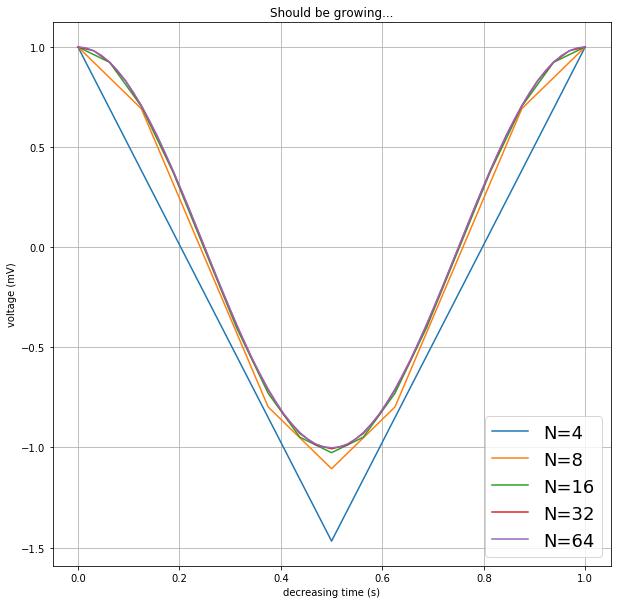

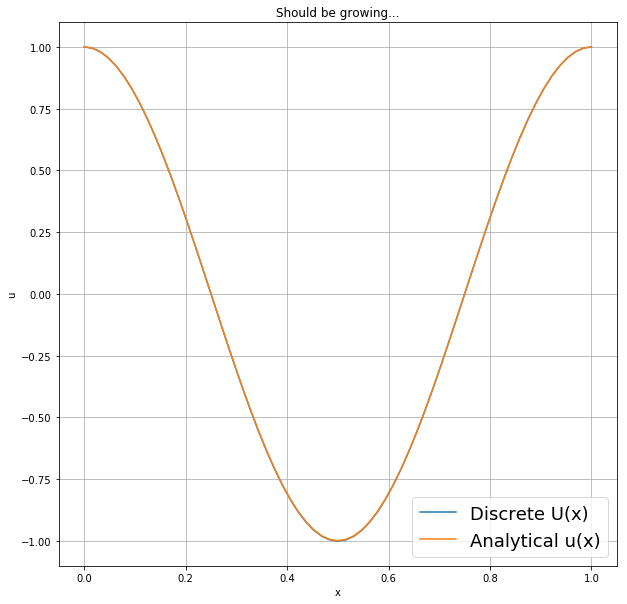

In [66]:
# Number of equally spaced subintervals
AllN = [4,8,16,32,64]
plt.figure(figsize=(10,10))
plt.xlabel('decreasing time (s)')
plt.ylabel('voltage (mV)')
plt.title('Should be growing...')
plt.grid(True)

for N in AllN:
    # Mesh size
    h = 1/N #Important! In Python 2 you needed to write 1.0 to prevent integer divsion
    # Define N+1 grid points via linspace which is part of numpy now aliased as np 
    x = np.linspace(0,1,N+1)
    A = np.zeros((N+1, N+1))

    # Define tridiagonal part of A by for rows 1 to N-1
    for i in range(1, N):
        A[i, i-1] = -1
        A[i, i+1] = -1
        A[i, i] = 2

    F = (h**2)*((2*np.pi)**2)*np.cos(2*np.pi*x)
    
    # Left boundary
    A[0,0] = 1
    F[0] = 1

    # Right boundary
    A[N,N] = 1
    F[N] = 1
    
    
    U = la.solve(A, F)
    #  "x-r" means mark data points as "x", connect them by a line and use red color
    plt.plot(x, U, "-",label='N=%d' %N)
    plt.legend(loc=4, prop={'size': 18})
    
#plt.figure()    
plt.figure(figsize=(10,10))
u = np.cos(2*np.pi*x)
plt.plot(x, U, "-", label='Discrete U(x)')
plt.plot(x, u, "-", label='Analytical u(x)')
plt.xlabel('x')
plt.ylabel('u')
plt.title('Should be growing...')
plt.grid(True)
plt.legend(loc=4, prop={'size': 18})




    

## Problem 3 b)

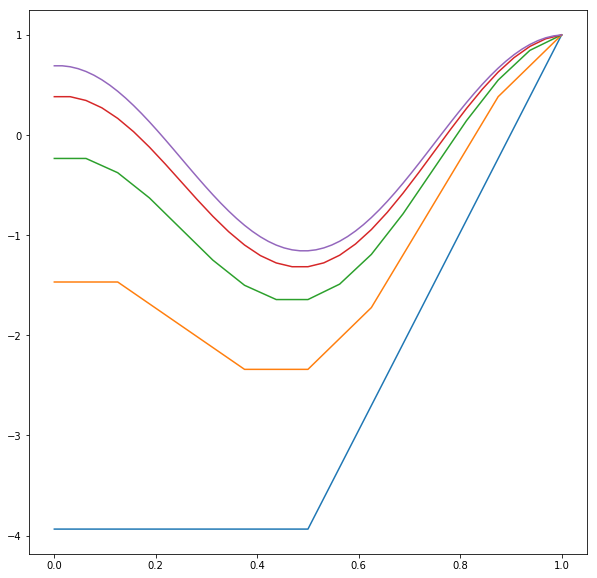

In [3]:
# Number of equally spaced subintervals
AllN = [4,8,16,32,64]
plt.figure(figsize=(10,10))
for N in AllN:
    # Mesh size
    h = 1/N #Important! In Python 2 you needed to write 1.0 to prevent integer divsion
    # Define N+1 grid points via linspace which is part of numpy now aliased as np 
    x = np.linspace(0,1,N+1)
    A = np.zeros((N+1, N+1))

    # Define tridiagonal part of A by for rows 1 to N-1
    for i in range(1, N):
        A[i, i-1] = -1
        A[i, i+1] = -1
        A[i, i] = 2

    F = (h**2)*((2*np.pi)**2)*np.cos(2*np.pi*x)
    
    # Left boundary
    A[0,0] = 1
    A[0,1] = -1
    F[0] = 0

    # Right boundary
    A[N,N] = 1
    F[N] = 1
    
    
    U = la.solve(A, F)
    #  "x-r" means mark data points as "x", connect them by a line and use red color
    plt.plot(x, U, "-")
    

## Problem 3 c)

In [4]:
# 3 c) Problem is NOT well posed

## Problem 4 a)

[0.4674011002723397, 0.1060585750910299, 0.025901493443758916, 0.006437928880157484, 0.0016071553587369003, 0.00040164361941608107]
[2.1397998593099854, 2.033754081756298, 2.0083667395265787, 2.0020872428212653, 2.0005215337284334]


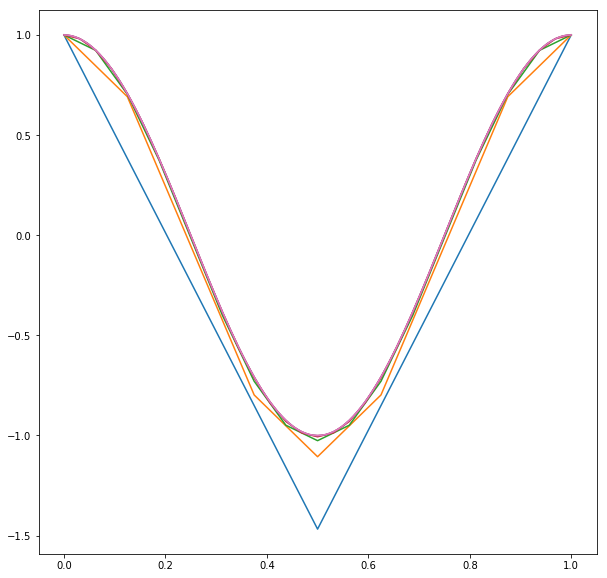

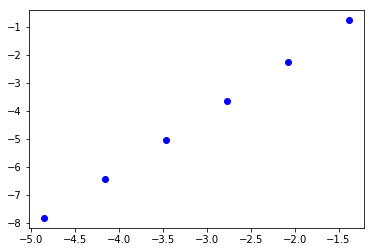

In [5]:
## Problem 4 a)

# Number of equally spaced subintervals
AllN = [4,8,16,32,64,128]
plt.figure(figsize=(10,10))
E = [] # Error list
EOC = [] # Experimental k

for N in AllN:
    s = 0
    # Mesh size
    h = 1/N #Important! In Python 2 you needed to write 1.0 to prevent integer divsion
    # Define N+1 grid points via linspace which is part of numpy now aliased as np 
    x = np.linspace(0,1,N+1)
    A = np.zeros((N+1, N+1))

    # Define tridiagonal part of A by for rows 1 to N-1
    for i in range(1, N):
        A[i, i-1] = -1
        A[i, i+1] = -1
        A[i, i] = 2

    F = (h**2)*((2*np.pi)**2)*np.cos(2*np.pi*x)
    
    # Left boundary
    A[0,0] = 1
    F[0] = 1

    # Right boundary
    A[N,N] = 1
    F[N] = 1
    
    U = la.solve(A, F)
    #  "x-r" means mark data points as "x", connect them by a line and use red color
    plt.figure(1)
    plt.plot(x, U, "-")
    
    u = np.cos(2*np.pi*x)
    
    diff = u-U # Compute difference
    
    E.append(np.linalg.norm(diff, np.inf))
    
    plt.figure(2)
    plt.plot(np.log(1/N),np.log(max(diff)),'bo')
    

plt.figure(1)
plt.plot(x, u, "-") # Plot analytical in fig 1

print(E)

for i in range(len(E)-1):
    EOC.append(np.log(E[i]/E[i+1])/np.log(2))

print(EOC)


## Problem 4 b)

[4.934802200544679, 2.4674011002723395, 1.23370055013617, 0.6168502750680847, 0.308425137534042, 0.1542125687670195]
[1.0, 0.9999999999999997, 1.0000000000000007, 1.0000000000000016, 1.000000000000014]


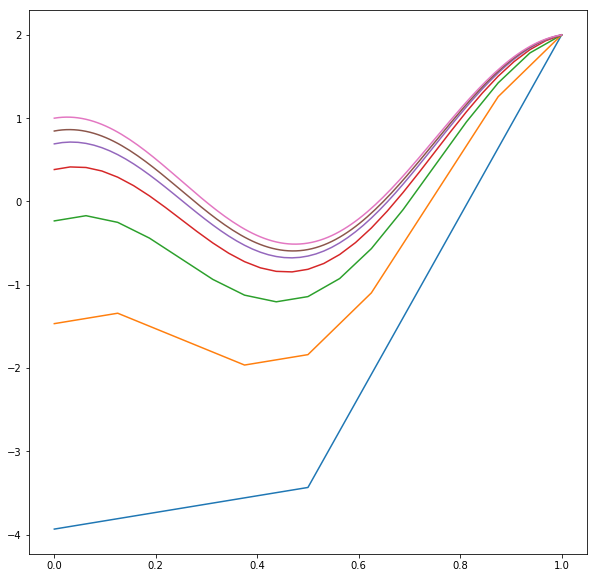

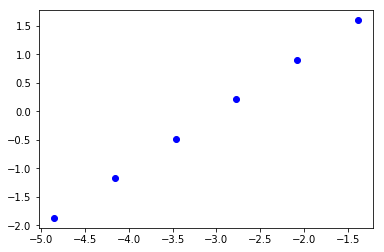

In [6]:
## Problem 4 b)

# Number of equally spaced subintervals
AllN = [4,8,16,32,64,128]
plt.figure(figsize=(10,10))
E = [] # Error list
EOC = [] # Experimental k

for N in AllN:
    s = 0
    # Mesh size
    h = 1/N #Important! In Python 2 you needed to write 1.0 to prevent integer divsion
    # Define N+1 grid points via linspace which is part of numpy now aliased as np 
    x = np.linspace(0,1,N+1)
    A = np.zeros((N+1, N+1))

    # Define tridiagonal part of A by for rows 1 to N-1
    for i in range(1, N):
        A[i, i-1] = -1
        A[i, i+1] = -1
        A[i, i] = 2

    F = (h**2)*((2*np.pi)**2)*np.cos(2*np.pi*x)
    
    # Left boundary
    A[0,0] = 1
    A[0,1] = -1
    F[0] = -h

    # Right boundary
    A[N,N] = 1
    F[N] = 2
    
    U = la.solve(A, F)
    #  "x-r" means mark data points as "x", connect them by a line and use red color
    plt.figure(1)
    plt.plot(x, U, "-")
    
    u = x + np.cos(2*np.pi*x)
    
    diff = u-U # Compute difference
    
    E.append(np.linalg.norm(diff, np.inf))
    # E.append(max(diff))
    plt.figure(2)
    plt.plot(np.log(1/N),np.log(max(diff)),'bo')
    

plt.figure(1)
plt.plot(x, u, "-") # Plot analytical in fig 1

print(E)

for i in range(len(E)-1):
    EOC.append(np.log(E[i]/E[i+1])/np.log(2))

print(EOC)

## Problem 4 c)

[1.3483831066349063, 0.3263521070878065, 0.08095381002263419, 0.020199360769925623, 0.005047405373164698, 0.0012616992980576947]
[2.046729198400549, 2.011258467611481, 2.0027893432548254, 2.000695774268125, 2.000173846247429]


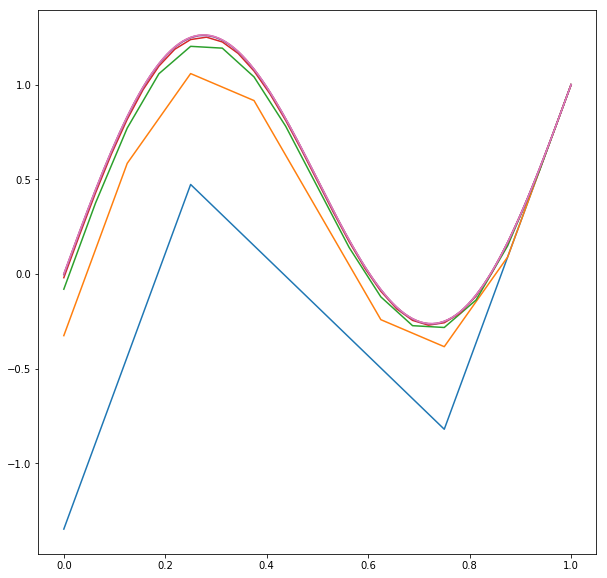

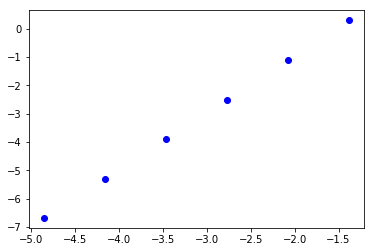

In [7]:
## Problem 4 c)

# Number of equally spaced subintervals
AllN = [4,8,16,32,64,128]
plt.figure(figsize=(10,10))
E = [] # Error list
EOC = [] # Experimental k

for N in AllN:
    s = 0
    # Mesh size
    h = 1/N #Important! In Python 2 you needed to write 1.0 to prevent integer divsion
    # Define N+1 grid points via linspace which is part of numpy now aliased as np 
    x = np.linspace(0,1,N+1)
    A = np.zeros((N+1, N+1))

    # Define tridiagonal part of A by for rows 1 to N-1
    for i in range(1, N):
        A[i, i-1] = -1
        A[i, i+1] = -1
        A[i, i] = 2

    F = (h**2)*((2*np.pi)**2)*np.sin(2*np.pi*x)
    
    # Left boundary
    A[0,0] = 1
    A[0,1] = -1
    F[0] = -h*(1+2*np.pi)

    # Right boundary
    A[N,N] = 1
    F[N] = 1
    
    U = la.solve(A, F)
    #  "x-r" means mark data points as "x", connect them by a line and use red color
    plt.figure(1)
    plt.plot(x, U, "-")
    
    u = x + np.sin(2*np.pi*x)
    
    diff = u-U # Compute difference
    
    E.append(np.linalg.norm(diff, np.inf))
   
    plt.figure(2)
    plt.plot(np.log(1/N),np.log(max(diff)),'bo')
    

plt.figure(1)
plt.plot(x, u, "-") # Plot analytical in fig 1

print(E)

for i in range(len(E)-1):
    EOC.append(np.log(E[i]/E[i+1])/np.log(2))

print(EOC)

## Problem 5 a)

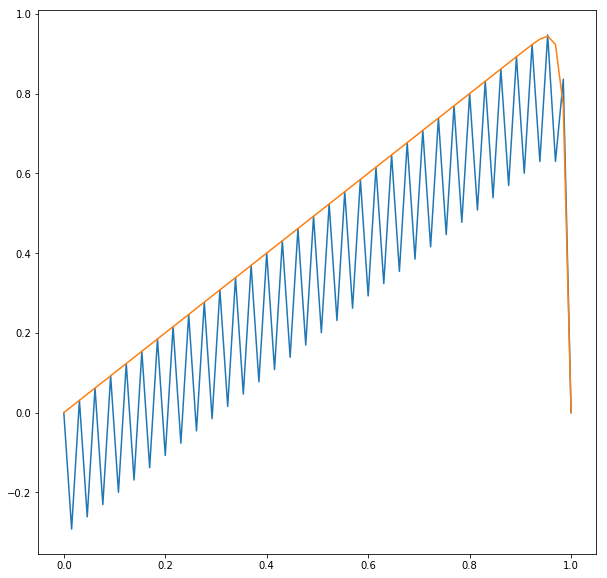

In [8]:
## Problem 5 a)

# Number of equally spaced subintervals
AllN = [65]#[5,9,17,33,65]
plt.figure(figsize=(10,10))
E = [] # Error list
EOC = [] # Experimental k

eps = 0.01

for N in AllN:
    # Mesh size
    h = 1/N #Important! In Python 2 you needed to write 1.0 to prevent integer divsion
    # Define N+1 grid points via linspace which is part of numpy now aliased as np 
    x = np.linspace(0,1,N+1)
    A = np.zeros((N+1, N+1))
    
    # Define tridiagonal part of A by for rows 1 to N-1
    for i in range(1, N):
        A[i, i-1] = -1/(2*h)
        A[i, i+1] = 1/(2*h)

    F = (1-np.exp((x-1)/eps)/eps*(1-np.exp(-1/eps)))
    #print(A)
    # Left boundary
    A[0,0] = 1
    F[0] = 0

    # Right boundary
    A[N,N] = 1
    F[N] = 0
    # print(A)
    U = la.solve(A, F)
    
    plt.figure(1)
    plt.plot(x, U, "-")

    
u = x-(np.exp((x-1)/eps)-np.exp(-1/eps))/(1-np.exp(-1/eps))
plt.plot(x, u, "-")
    
